# Apartment Listings Market Analysis in St. Petersburg

The goal of this project is to explore and model the market value of residential real estate based on historical apartment listings from the Yandex Real Estate service. The dataset contains several years of advertisements for apartments in St. Petersburg and nearby localities. Each listing includes:

- information entered manually by the user (total area, number of rooms, price, etc.), and
- features generated automatically from map data (distance to the city center, airports, parks, water bodies, and more).

The main business objective is to **identify patterns in apartment prices** and **determine which factors have the strongest impact on market value**. This knowledge can be used to build an automated monitoring system that detects anomalies and potential fraud in new listings.

***


**Data Description**
* `airports_nearest` — distance to the airport in meters (m)
* `balcony` — number of balconies
* `ceiling_height` - ceiling height (m)
* `cityCenters_nearest` — distance to city center (m)
* `days_exposition` - how many days the ad was placed (from publication to withdrawal)
* `first_day_exposition` — publication date
* `floor` - floor
* `floors_total` - total floors in the house
* `is_apartment` — apartment (boolean type)
* `kitchen_area` - kitchen area in square meters (m²)
* `last_price` - price at the time of removal from publication
* `living_area` - living area in square meters (meter²)
* `locality_name` - the name of the locality
* `open_plan` - free planning (boolean type)
* `parks_around3000` - number of parking lots within a 3 km radius
* `parks_nearest` — distance to the park (m)
* `ponds_around3000` - the number of ponds within a radius of 3 km
* `ponds_nearest` - distance to the nearest body of water (m)
* `rooms` - number of rooms
* `studio` - studio apartment (boolean)
* `total_area` - area of ​​the apartment in square meters (m²)
* `total_images` - the number of photos of the apartment in the ad

***

# Initial Data Examination

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid", font_scale=1.2)

In [ ]:
df = pd.read_csv('Data/real_estate_data.csv', sep='\t')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
df.describe()


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [6]:
df.duplicated().sum()

0

In [7]:
df.shape, df.columns

((23699, 22),
 Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
        'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
        'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
        'locality_name', 'airports_nearest', 'cityCenters_nearest',
        'parks_around3000', 'parks_nearest', 'ponds_around3000',
        'ponds_nearest', 'days_exposition'],
       dtype='object'))

In [8]:
df.isna().sum().sort_values(ascending=False)

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
ponds_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
rooms                       0
first_day_exposition        0
total_area                  0
last_price                  0
total_images                0
studio                      0
floor                       0
open_plan                   0
dtype: int64

In [9]:
df['first_day_exposition'].head()

0    2019-03-07T00:00:00
1    2018-12-04T00:00:00
2    2015-08-20T00:00:00
3    2015-07-24T00:00:00
4    2018-06-19T00:00:00
Name: first_day_exposition, dtype: object

In [10]:
df['is_apartment'].value_counts(dropna=False)

NaN      20924
False     2725
True        50
Name: is_apartment, dtype: int64

In [11]:
df['locality_name'].nunique()

364

### Initial Data Examination — Summary

The dataset contains **23,699 observations** and **22 features** describing apartment listings in St. Petersburg and nearby localities. The columns cover:
- **Price and size**: `last_price`, `total_area`, `living_area`, `kitchen_area`
- **Building and layout**: `rooms`, `floor`, `floors_total`, `ceiling_height`, `balcony`, `studio`, `open_plan`, `is_apartment`
- **Location-related features**: `locality_name`, `cityCenters_nearest`, `airports_nearest`,
  `parks_nearest`, `parks_around3000`, `ponds_nearest`, `ponds_around3000`
- **Listing metadata**: `total_images`, `first_day_exposition`, `days_exposition`

The **structure overview** (`df.info()`) shows that most variables are numeric (`int64`/`float64`), while `first_day_exposition` and `locality_name` are stored as `object`. The date column will later be converted to a proper datetime type, and `is_apartment` is currently represented as integers (0/1) with a large number of missing values.

A **missing-value summary** reveals several columns with substantial gaps:
- `is_apartment` has missing values in ~**88%** of rows (20,924 entries).
- Distance and environment features such as `parks_nearest`, `ponds_nearest`, `airports_nearest`,
  `cityCenters_nearest`, `parks_around3000`, and `ponds_around3000` have between **5,000–15,000** missing values.
- Apartment characteristics like `balcony`, `ceiling_height`, `kitchen_area`, and `living_area` also contain notable amounts of missing data.
- `days_exposition` is missing for 3,181 listings, meaning the time-on-market information is not available for all sales.
- Core structural variables (`rooms`, `total_area`, `floor`, `studio`, `open_plan`, `total_images`, `last_price`) have no missing values.

The **descriptive statistics** indicate:
- The **median total area** is about **52 m²**, with a maximum of **900 m²**, suggesting the presence of extremely large and potentially atypical properties.
- The **median price** is roughly **4.65 million RUB**, while the maximum exceeds **760 million RUB**, pointing to a strongly right-skewed price distribution and possible outliers.
- **Ceiling height** typically lies around **2.5–2.8 m**, but the maximum recorded value of **100 m** is clearly unrealistic and will require cleaning.
- Buildings range from **1** to **60 floors**, again indicating some extreme values.
- No **fully duplicated rows** are present in the dataset.

There are **364 unique localities** in `locality_name`, which confirms that the data covers not only St. Petersburg but also a large number of surrounding towns and settlements.

Overall, the dataset is rich and detailed but contains:
1. **Substantial missingness** in several location and apartment-characteristic features.
2. **Potential outliers and implausible values** (e.g., unrealistically high ceiling heights and prices).
3. **Data-type issues** (dates stored as strings, boolean-like variables stored as integers).

***

# Data Preprocessing




In [12]:
# Rename some columns and reorder them
df = df.rename(columns={
    'studio': 'is_studio',
    'open_plan': 'is_open_plan',
    'cityCenters_nearest': 'city_centers_nearest',
    'parks_around3000': 'parks_around_3000',
    'ponds_around3000': 'ponds_around_3000'
})

df = df[['locality_name',
         'last_price',
         'is_apartment',
         'is_studio',
         'is_open_plan',
         'total_area',
         'living_area',
         'kitchen_area',
         'rooms',
         'ceiling_height',
         'floor',
         'floors_total',
         'balcony',
         'first_day_exposition',
         'days_exposition',
         'total_images',
         'airports_nearest',
         'city_centers_nearest',
         'parks_around_3000',
         'parks_nearest',
         'ponds_around_3000',
         'ponds_nearest']]

df.isnull().sum().sort_values()

last_price                  0
is_studio                   0
total_area                  0
is_open_plan                0
first_day_exposition        0
total_images                0
floor                       0
rooms                       0
locality_name              49
floors_total               86
living_area              1903
kitchen_area             2278
days_exposition          3181
parks_around_3000        5518
ponds_around_3000        5518
city_centers_nearest     5519
airports_nearest         5542
ceiling_height           9195
balcony                 11519
ponds_nearest           14589
parks_nearest           15620
is_apartment            20924
dtype: int64

Before handling missing values and data types, I performed a small cleanup of the column names and their order to make the dataset easier to work with.

**1. Column renaming**

Several columns were renamed to improve clarity and enforce a consistent `snake_case` style:

- `studio` → `is_studio`
- `open_plan` → `is_open_plan`
- `cityCenters_nearest` → `city_centers_nearest`
- `parks_around3000` → `parks_around_3000`
- `ponds_around3000` → `ponds_around_3000`


**2. Column ordering**

The columns were then reordered into logical groups:

- **Location and price**: `locality_name`, `last_price`
- **Property type flags**: `is_apartment`, `is_studio`, `is_open_plan`
- **Size and layout**: `total_area`, `living_area`, `kitchen_area`, `rooms`, `ceiling_height`
- **Building structure**: `floor`, `floors_total`, `balcony`
- **Listing metadata**: `first_day_exposition`, `days_exposition`, `total_images`
- **Environment and distances**: `airports_nearest`, `city_centers_nearest`,
  `parks_around_3000`, `parks_nearest`, `ponds_around_3000`, `ponds_nearest`

This reordering does not change the data itself, but makes it easier to read the table and to focus on related features together during EDA.



In [13]:
df['locality_name'].unique(), df['locality_name'].nunique()

(array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
        'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
        'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
        'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
        'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
        'деревня Новое Девяткино', 'посёлок Металлострой',
        'посёлок городского типа Лебяжье',
        'посёлок городского типа Сиверский', 'поселок Молодцово',
        'поселок городского типа Кузьмоловский',
        'садовое товарищество Новая Ропша', 'Павловск',
        'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
        'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
        'поселок городского типа Ефимовский', 'посёлок Плодовое',
        'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
        'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
        'дерев

In [14]:
df['locality_name'] = (
    df['locality_name']
      .str.lower()
      .str.strip()
      .str.replace('ё', 'е', regex=True)
)
df['locality_name'].nunique()

330

In [15]:
df['locality_name'].isna().sum()

49

- 49 rows out of ~23.7k is <0.3% of the data.
- Locality is crucial for later tasks (top-10 localities, price per m² per locality), and there is no sensible way to impute it.

In [16]:
df = df.dropna(subset=['locality_name'])
df['locality_name'].isna().sum()

0

In [17]:
print("Apartment:", df['is_apartment'].unique())
print("Open Plan:", df['is_open_plan'].unique())
print("Studio:", df['is_studio'].unique())

Apartment: [nan False True]
Open Plan: [False  True]
Studio: [False  True]


Usually, only special properties are explicitly marked as apartment = True; if the field is empty, we assume a normal apartment and set the flag to False instead of dropping thousands of rows.

In [18]:
df['is_apartment'] = df['is_apartment'].fillna(False).astype(bool)
df['is_studio'] = df['is_studio'].astype(bool)
df['is_open_plan'] = df['is_open_plan'].astype(bool)
print("Apartment:", df['is_apartment'].unique())
print("Open Plan:", df['is_open_plan'].unique())
print("Studio:", df['is_studio'].unique())

Apartment: [False  True]
Open Plan: [False  True]
Studio: [False  True]


In [19]:
df.sample(5)

,locality_name,last_price,is_apartment,is_studio,is_open_plan,total_area,living_area,kitchen_area,rooms,ceiling_height,...,balcony,first_day_exposition,days_exposition,total_images,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest
14452,гатчина,4500000.0,False,False,False,71.9,42.0,8.5,3,2.60,...,NaN,2018-08-24T00:00:00,172.0,14,NaN,NaN,NaN,NaN,NaN,NaN
19124,санкт-петербург,4100000.0,False,False,False,40.0,22.0,7.0,1,2.65,...,NaN,2019-01-15T00:00:00,NaN,8,30011.0,12872.0,0.0,NaN,0.0,NaN
7317,колпино,3750000.0,False,False,False,50.0,28.0,7.0,2,NaN,...,1.0,2017-01-23T00:00:00,45.0,0,25519.0,31305.0,1.0,440.0,0.0,NaN
13585,деревня новое девяткино,5190000.0,False,False,False,69.0,39.0,10.0,2,3.00,...,2.0,2018-04-04T00:00:00,63.0,15,NaN,NaN,NaN,NaN,NaN,NaN
7055,санкт-петербург,3380000.0,False,False,False,38.0,20.0,10.0,1,2.70,...,1.0,2016-02-26T00:00:00,174.0,10,15617.0,14413.0,1.0,504.0,0.0,NaN


The data looks already better

In [20]:
print(df['balcony'].unique())
print(df['balcony'].value_counts())

[nan  2.  0.  1.  5.  4.  3.]
1.0    4187
0.0    3725
2.0    3658
5.0     304
4.0     182
3.0      81
Name: balcony, dtype: int64


**Balcony count**

The column `balcony` stores the number of balconies for each apartment. The observed values are 0, 1, 2, 3, 4 and 5, plus missing values. It is reasonable to assume that if a listing has no balcony, the seller may simply leave this field empty, while omitting an existing balcony is unlikely.

Therefore, I will impute missing values in `balcony` with 0


In [21]:
df['balcony'] = df['balcony'].fillna(0).astype(int)

***

In [22]:
df['ceiling_height'].isna().sum()

9160

In [23]:
# Median within each locality
df['ceiling_height'] = df['ceiling_height'].fillna(
    df.groupby('locality_name')['ceiling_height'].transform('median')
)


In [24]:
df['ceiling_height'].isna().sum()

106

In [25]:
# Overall median
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

The column `ceiling_height` has a large number of missing values (9,160 rows). Ceiling height is strongly related to the type and age of buildings, which can vary across different localities. To respect this structure, I imputed missing values using the median ceiling height within each locality.

For a small number of rows (106) the locality-specific median could not be computed (for example, if all values in that locality were missing). For these remaining cases I used the overall median ceiling height in the dataset.

In [26]:
df.isnull().sum().sort_values()

locality_name               0
last_price                  0
is_apartment                0
is_studio                   0
is_open_plan                0
total_area                  0
ceiling_height              0
rooms                       0
total_images                0
first_day_exposition        0
floor                       0
balcony                     0
floors_total               85
living_area              1898
kitchen_area             2269
days_exposition          3180
parks_around_3000        5510
ponds_around_3000        5510
city_centers_nearest     5511
airports_nearest         5534
ponds_nearest           14565
parks_nearest           15586
dtype: int64

**Remaining missing values**

Some features still contain missing values:

- `floors_total`
- `living_area`
- `kitchen_area`
- `days_exposition`
- `airports_nearest`
- `city_centers_nearest`
- `parks_nearest`
- `ponds_nearest`
- `parks_around_3000`
- `ponds_around_3000`

For these variables there is no clear and reliable default value. In many cases the missingness is likely due to unavailable external map data or incomplete user input. Instead of forcing arbitrary numbers, I keep these entries as NaN and will handle them selectively in later analysis.

***

To make price comparisons meaningful across apartments of different sizes, I created a new variable: `price per square meter`.

In [27]:
df['price_per_meter'] = (df['last_price'] / df['total_area']).round(1)
df.sample(5)


,locality_name,last_price,is_apartment,is_studio,is_open_plan,total_area,living_area,kitchen_area,rooms,ceiling_height,...,first_day_exposition,days_exposition,total_images,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,price_per_meter
6784,санкт-петербург,4300000.0,False,False,False,44.0,27.0,6.3,2,2.50,...,2018-03-17T00:00:00,104.0,12,51544.0,16787.0,0.0,NaN,1.0,1032.0,97727.3
1228,санкт-петербург,8200000.0,False,False,False,81.0,42.0,14.0,3,2.70,...,2017-11-10T00:00:00,98.0,10,32036.0,8175.0,0.0,NaN,1.0,644.0,101234.6
9868,санкт-петербург,11305000.0,False,False,False,119.0,60.9,14.9,3,3.00,...,2018-07-01T00:00:00,90.0,18,53364.0,17858.0,0.0,NaN,2.0,370.0,95000.0
16956,санкт-петербург,3300000.0,False,False,False,41.3,25.9,6.3,2,2.70,...,2017-01-23T00:00:00,28.0,0,42156.0,14660.0,1.0,675.0,0.0,NaN,79903.1
2307,санкт-петербург,9000000.0,False,False,False,50.0,25.4,7.5,2,3.25,...,2018-09-11T00:00:00,NaN,10,26812.0,5510.0,3.0,502.0,0.0,NaN,180000.0


***

The `last_price` and `price_per_meter` columns contain very large values because the dataset stores monetary amounts in rubles.
To improve readability and enhance the interpretability of plots and summary statistics, I convert both features to millions of rubles:

In [28]:
df['last_price'] = (df['last_price'].notnull()) * (df['last_price'] / 1_000_000).round(2)
df['price_per_meter'] = (df['price_per_meter'].notnull()) * (df['price_per_meter'] / 1_000).round(3)
df[['last_price', 'price_per_meter']].head(3)


,last_price,price_per_meter
0,13.00,120.370
1,3.35,82.921
2,5.20,92.786


***

The column `first_day_exposition` was initially stored as an object (string), which prevents proper date-based analysis.
I converted it into a datetime format:

In [29]:
df['first_day_exposition'] = pd.to_datetime(
    df['first_day_exposition'], 
    format="%Y-%m-%dT%H:%M:%S"
)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   locality_name         23650 non-null  object        
 1   last_price            23650 non-null  float64       
 2   is_apartment          23650 non-null  bool          
 3   is_studio             23650 non-null  bool          
 4   is_open_plan          23650 non-null  bool          
 5   total_area            23650 non-null  float64       
 6   living_area           21752 non-null  float64       
 7   kitchen_area          21381 non-null  float64       
 8   rooms                 23650 non-null  int64         
 9   ceiling_height        23650 non-null  float64       
 10  floor                 23650 non-null  int64         
 11  floors_total          23565 non-null  float64       
 12  balcony               23650 non-null  int64         
 13  first_day_exposi

***

Let's extract the weekday, month, and year of listing.
These features will help determine whether posting behavior changes throughout the week, across seasons, or over years.

In [30]:
dt = df['first_day_exposition']

df['weekday_exposition'] = dt.dt.dayofweek + 1  # Monday=1, Sunday=7
df['month_exposition']   = dt.dt.month
df['year_exposition']    = dt.dt.year

df.head(5)

,locality_name,last_price,is_apartment,is_studio,is_open_plan,total_area,living_area,kitchen_area,rooms,ceiling_height,...,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,price_per_meter,weekday_exposition,month_exposition,year_exposition
0,санкт-петербург,13.00,False,False,False,108.0,51.0,25.0,3,2.70,...,18863.0,16028.0,1.0,482.0,2.0,755.0,120.370,4,3,2019
1,поселок шушары,3.35,False,False,False,40.4,18.6,11.0,1,2.63,...,12817.0,18603.0,0.0,NaN,0.0,NaN,82.921,2,12,2018
2,санкт-петербург,5.20,False,False,False,56.0,34.3,8.3,2,2.70,...,21741.0,13933.0,1.0,90.0,2.0,574.0,92.786,4,8,2015
3,санкт-петербург,64.90,False,False,False,159.0,NaN,NaN,3,2.70,...,28098.0,6800.0,2.0,84.0,3.0,234.0,408.176,5,7,2015
4,санкт-петербург,10.00,False,False,False,100.0,32.0,41.0,2,3.03,...,31856.0,8098.0,2.0,112.0,1.0,48.0,100.000,2,6,2018


***

For the analysis of price differences by floor, it is helpful to group individual floor numbers into broader categories.  
I created a new categorical feature `floor_level` with three values:

- `"first"` – apartments located on the first floor,
- `"last"` – apartments located on the top floor of the building,
- `"other"` – all intermediate floors.

In cases where `floors_total` is missing, the listing cannot confidently be classified as "last floor", so these observations are treated as `"other"`.

This aggregation will make it easier to compare typical price patterns for first, last and other floors.


In [31]:
def floor_level(row):
    if row['floor'] == 1:
        return 'first'
    elif row['floor'] == row['floors_total']:
        return 'last'
    else:
        return 'another'

df['floor_level'] = df.apply(floor_level, axis=1)
df.sample(5)


,locality_name,last_price,is_apartment,is_studio,is_open_plan,total_area,living_area,kitchen_area,rooms,ceiling_height,...,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,price_per_meter,weekday_exposition,month_exposition,year_exposition,floor_level
6589,сертолово,3.05,False,False,False,48.5,22.0,10.0,1,2.6,...,NaN,NaN,NaN,NaN,NaN,62.887,1,10,2017,another
5798,санкт-петербург,6.28,False,False,False,62.2,25.0,16.1,2,2.7,...,9850.0,0.0,NaN,0.0,NaN,100.965,4,4,2019,another
19892,санкт-петербург,4.37,False,False,False,54.7,32.8,7.1,3,2.5,...,28806.0,0.0,NaN,0.0,NaN,79.890,3,3,2016,last
12606,поселок кобралово,2.03,False,False,False,54.0,30.0,9.0,2,2.6,...,NaN,NaN,NaN,NaN,NaN,37.593,7,10,2017,another
16341,колпино,4.00,False,False,False,76.0,47.0,9.0,3,2.5,...,32342.0,0.0,NaN,1.0,745.0,52.632,5,11,2017,another


***

In addition to absolute areas, the *relative* size of the living and kitchen space within the apartment may also influence the price.  
To capture this, I calculated the following ratios:

In [32]:
df['living_share'] = (df['living_area'] / df['total_area']).round(3)
df['kitchen_share'] = (df['kitchen_area'] / df['total_area']).round(3)
df.head(5)

,locality_name,last_price,is_apartment,is_studio,is_open_plan,total_area,living_area,kitchen_area,rooms,ceiling_height,...,parks_nearest,ponds_around_3000,ponds_nearest,price_per_meter,weekday_exposition,month_exposition,year_exposition,floor_level,living_share,kitchen_share
0,санкт-петербург,13.00,False,False,False,108.0,51.0,25.0,3,2.70,...,482.0,2.0,755.0,120.370,4,3,2019,another,0.472,0.231
1,поселок шушары,3.35,False,False,False,40.4,18.6,11.0,1,2.63,...,NaN,0.0,NaN,82.921,2,12,2018,first,0.460,0.272
2,санкт-петербург,5.20,False,False,False,56.0,34.3,8.3,2,2.70,...,90.0,2.0,574.0,92.786,4,8,2015,another,0.612,0.148
3,санкт-петербург,64.90,False,False,False,159.0,NaN,NaN,3,2.70,...,84.0,3.0,234.0,408.176,5,7,2015,another,NaN,NaN
4,санкт-петербург,10.00,False,False,False,100.0,32.0,41.0,2,3.03,...,112.0,1.0,48.0,100.000,2,6,2018,another,0.320,0.410


***

## Exploratory data analysis


In [33]:
df[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()


,total_area,last_price,rooms,ceiling_height
count,23650.000000,23650.000000,23650.000000,23650.000000
mean,60.329069,6.541175,2.070106,2.732203
std,35.661808,10.896397,1.078620,1.002602
min,12.000000,0.010000,0.000000,1.000000
25%,40.000000,3.400000,1.000000,2.550000
50%,52.000000,4.650000,2.000000,2.700000
75%,69.700000,6.800000,3.000000,2.700000
max,900.000000,763.000000,19.000000,100.000000


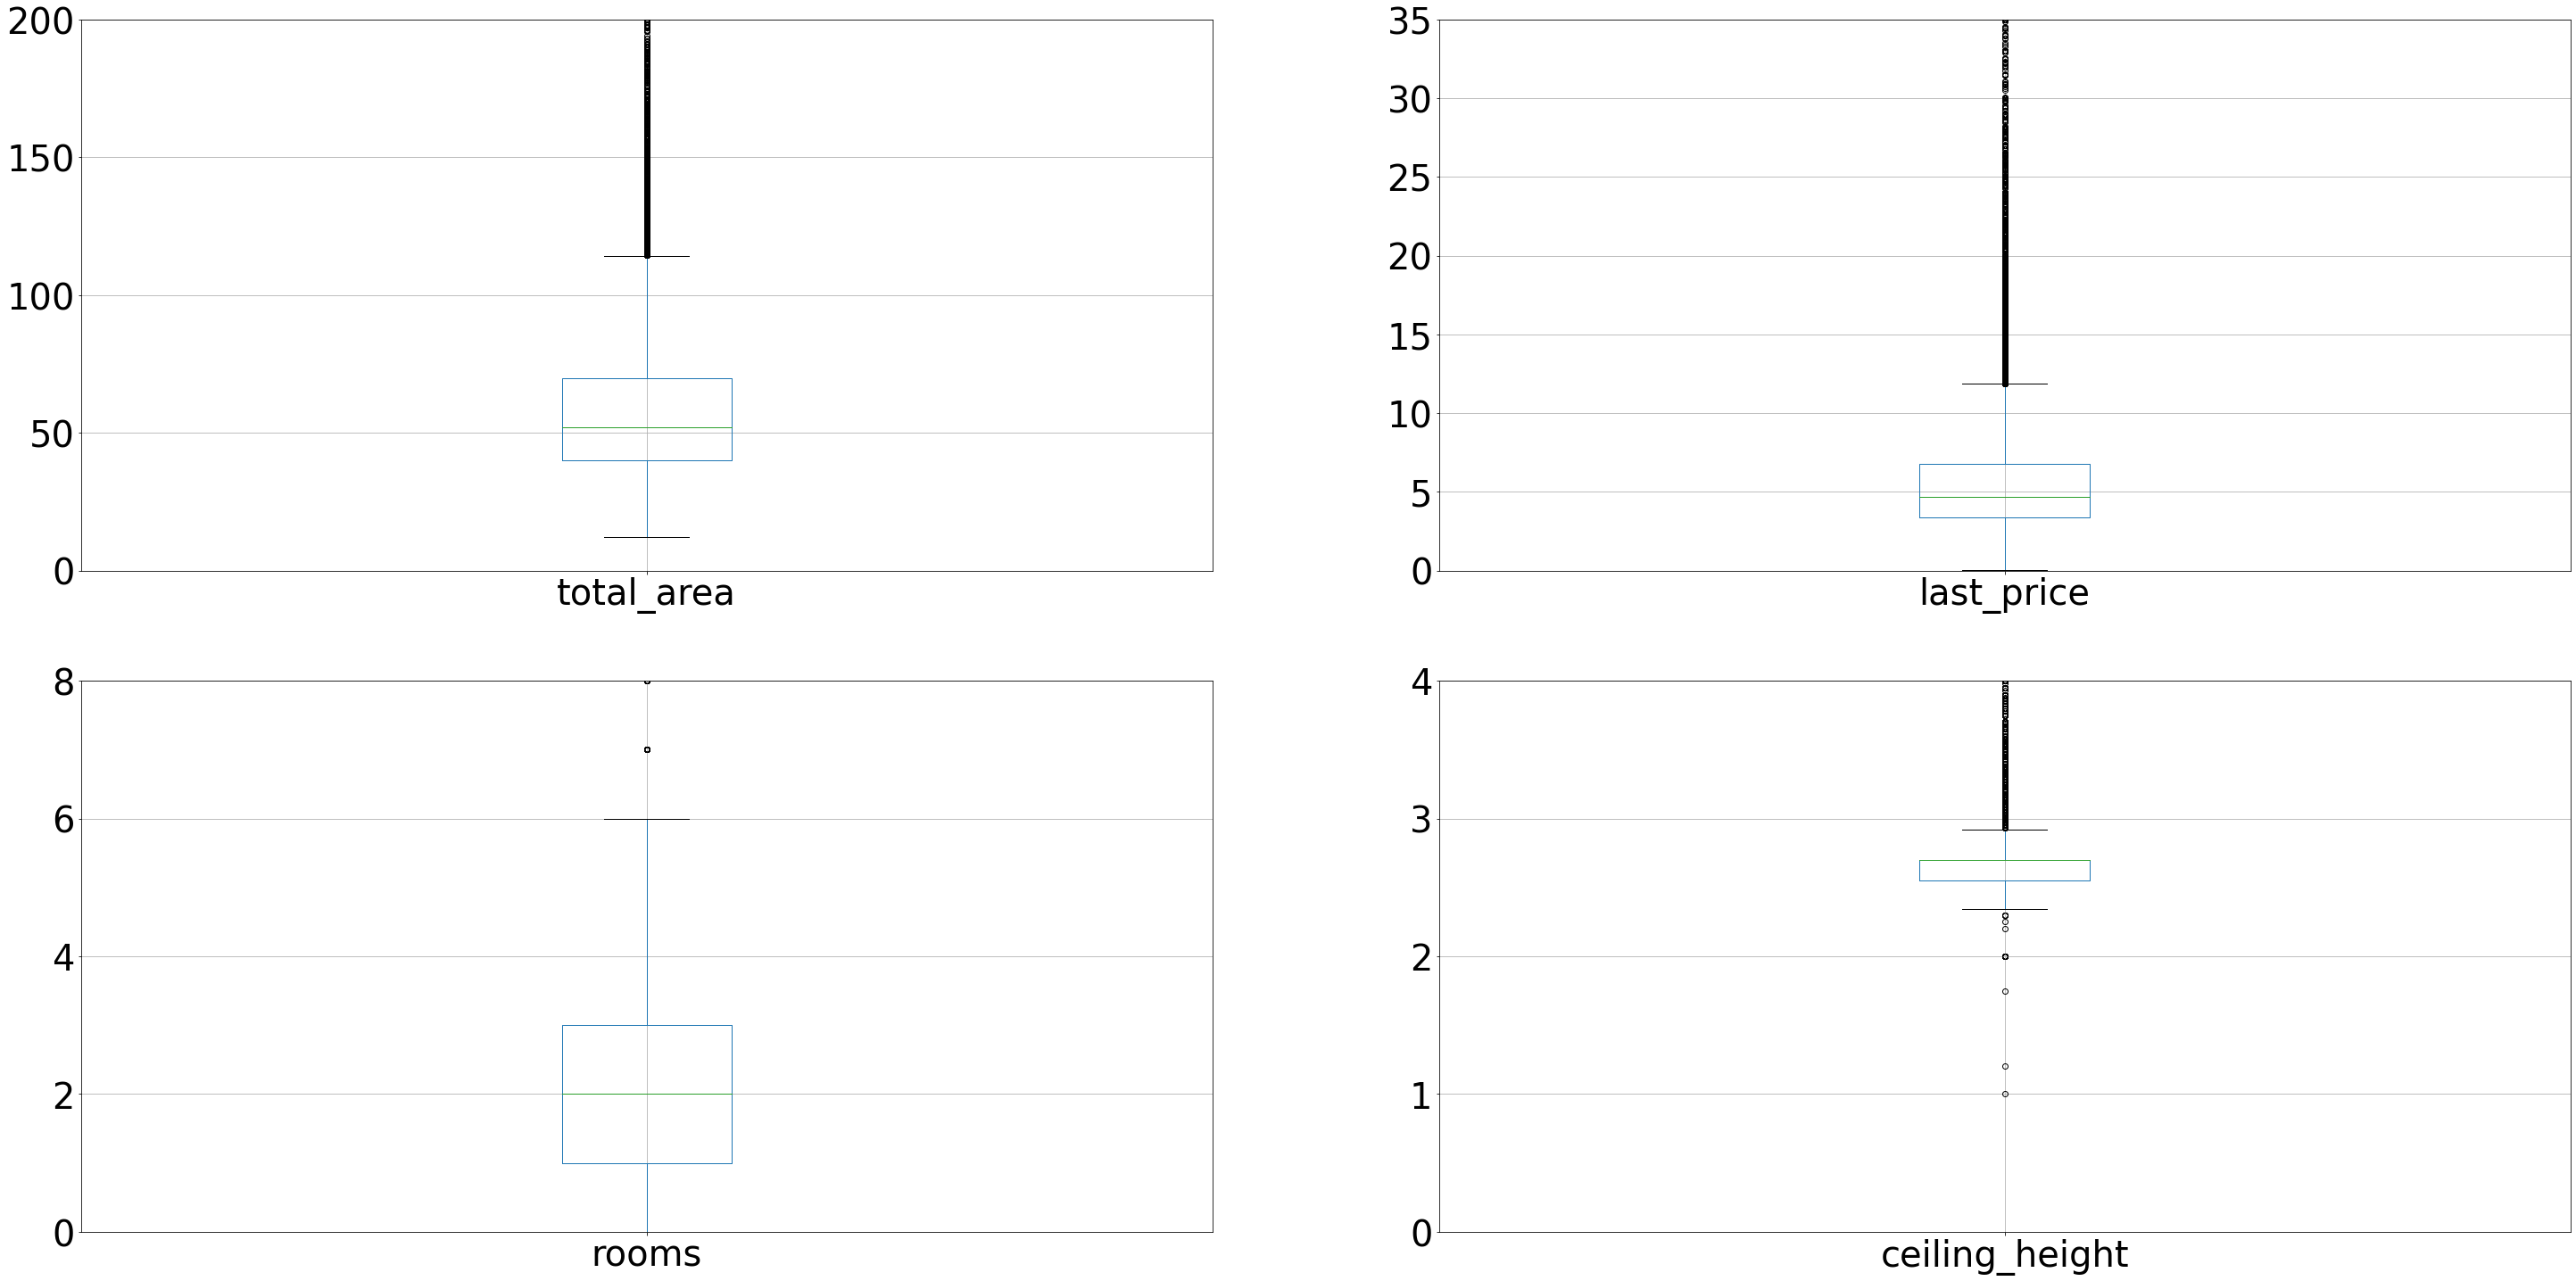

In [34]:
rows = 2
cols = 2
fig, axes = plt.subplots(rows, cols, figsize=(50,25))
column_list = ['total_area', 'last_price', 'rooms', 'ceiling_height']
ylims = [200, 35, 8, 4]
count = 0
for r in range(rows):
    for c in range(cols):
        ax = df.boxplot(column=column_list[count], ax=axes[r,c], fontsize=40)
        ax.set_ylim([0, ylims[count]])
        count += 1

/Users/anna-liza/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


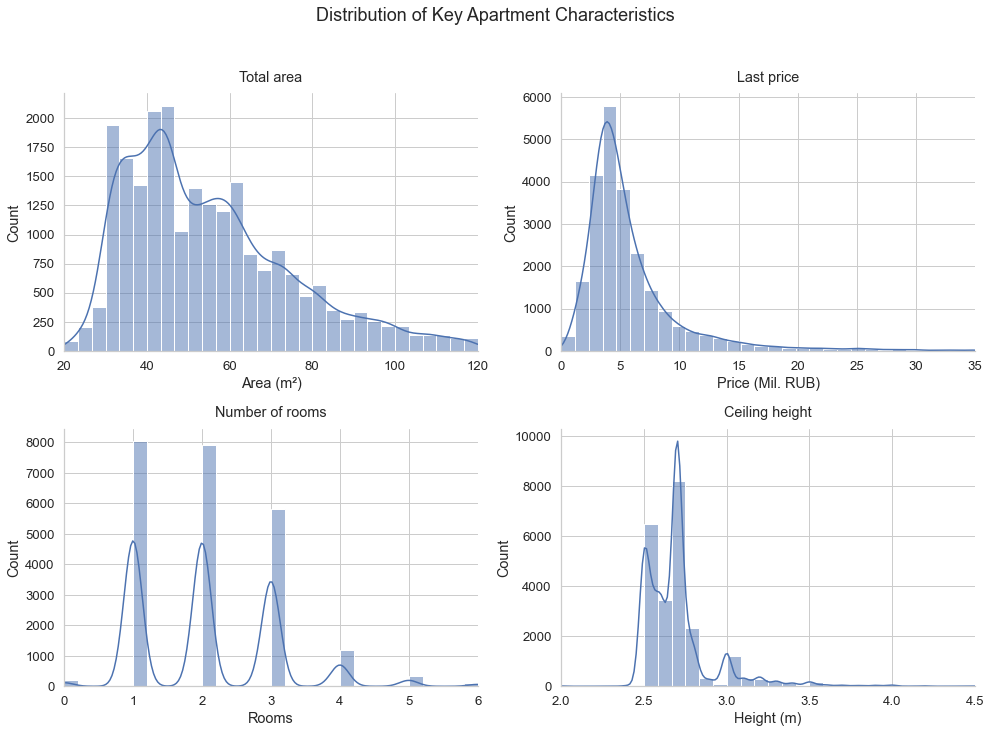

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Distribution of Key Apartment Characteristics", fontsize=18, y=1.02)

plots = [
    ("total_area",      (20, 120),   "Total area",       "Area (m²)"),
    ("last_price",      (0, 35),  "Last price",       "Price (Mil. RUB)"),
    ("rooms",           (0, 6),      "Number of rooms",  "Rooms"),
    ("ceiling_height",  (2, 4.5),    "Ceiling height",   "Height (m)"),
]

for ax, (col, x_range, title, xlabel) in zip(axes.ravel(), plots):
    data = df[(df[col] >= x_range[0]) & (df[col] <= x_range[1])]
    sns.histplot(
        data=data,
        x=col,
        bins=30,
        binrange=x_range,
        kde=True,          # smooth curve on top
        ax=ax,)
    ax.set_xlim(x_range)
    ax.set_title(title, pad=12)
    ax.set_xlabel(xlabel)
    ax.set_ylabel("Count")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

plt.tight_layout()
plt.show()


Based on the histograms and summary statistics for total area, price, number of rooms and ceiling height, we can describe a “typical” apartment in the dataset and highlight unusual observations.

**Total area**

- The distribution of `total_area` is right-skewed.  
- Most apartments lie roughly between **30 and 80 m²**, with a clear concentration around **40–50 m²**.  
- Values above **100 m²** are relatively rare and represent larger, less typical properties.  
- The maximum of **900 m²** is far outside the main range and should be treated as an outlier or special case.

**Price**

- `last_price` (in million rubles) is also strongly right-skewed.  
- The bulk of listings is in the range of approximately **3–6 million RUB**, with the median at **4.65 million RUB**.  
- A long tail extends to very expensive objects; the extreme maximum of **763 million RUB** is clearly an outlier and can heavily distort summary statistics if not handled separately.  
- There are also a few very cheap listings (around **0.01–0.1 million RUB**), which might correspond to data entry errors or incomplete information.

**Number of rooms**

- The vast majority of apartments have **1–3 rooms**. Peaks in the histogram are clearly visible at **1, 2 and 3 rooms**, which is typical for standard city apartments.  
- There are some listings with **0 rooms**, which most likely correspond to studio apartments.  
- Values above **5–6 rooms** are very rare, and the maximum of **19 rooms** is highly atypical and should be considered an outlier.

**Ceiling height**

- Most ceiling heights fall between **2.5 and 2.9 m**, which matches standard residential building norms.  
- There is also a noticeable group of apartments with slightly lower ceilings around **2.3–2.5 m**.  
- Extremely low (around **1 m**) and extremely high values (up to **100 m**) are not realistic and almost certainly result from data entry mistakes (for example, confusing ceiling height with total area or number of rooms).

**Overall**

- A typical apartment in this dataset is a **1–3 room flat** of about **40–60 m²** with ceilings around **2.5–2.8 m**, priced at roughly **3–6 million RUB**.  
- All four variables contain a small number of extreme or implausible values. In later steps, these outliers should either be filtered out or handled explicitly so they do not bias the analysis of price drivers.

***


In [36]:
days = df['days_exposition'].dropna()
days.describe()

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [37]:
median_days = days.median()
mean_days = days.mean()

print(f"Mean days on market:   {mean_days:.1f}")
print(f"Median days on market: {median_days:.1f}")

Mean days on market:   180.8
Median days on market: 95.0


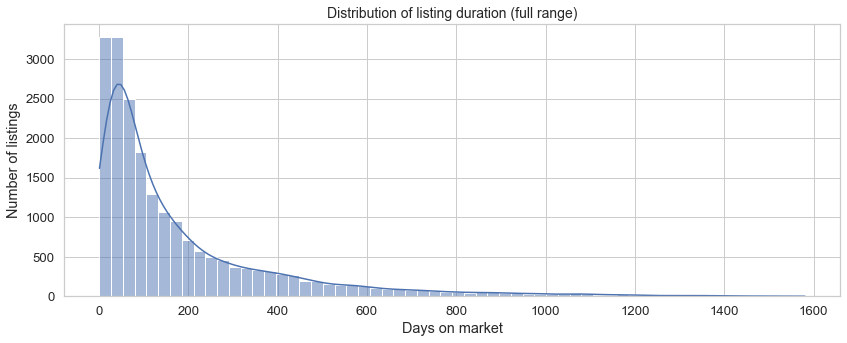

In [38]:
plt.figure(figsize=(12, 5))
sns.histplot(days, bins=60, kde=True)
plt.title("Distribution of listing duration (full range)", fontsize=14)
plt.xlabel("Days on market")
plt.ylabel("Number of listings")
plt.tight_layout()
plt.show()


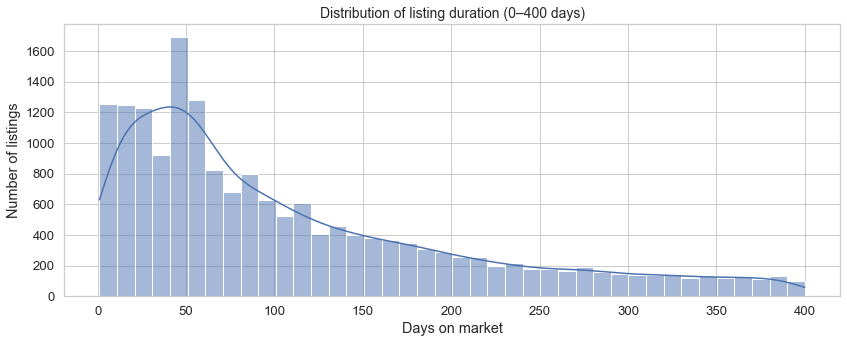

In [39]:
plt.figure(figsize=(12, 5))
sns.histplot(days[days <= 400], bins=40, kde=True)
plt.title("Distribution of listing duration (0–400 days)", fontsize=14)
plt.xlabel("Days on market")
plt.ylabel("Number of listings")
plt.tight_layout()
plt.show()

In [40]:
days.value_counts().head()

45.0    879
60.0    538
7.0     234
30.0    208
90.0    203
Name: days_exposition, dtype: int64

#### Listing duration (days_exposition)

- The mean listing duration is about **181 days** (roughly half a year),  
  while the median is **95 days** (around three months).  
  This indicates a **right-skewed distribution**: most apartments are sold
  faster than the average, but a small number of listings stay on the market
  for a very long time.

- The maximum observed value is **1580 days** (~4.5 years). This is most
  likely an outlier – for example, the seller might have forgotten to remove
  the listing or the information was not updated for a long period.

- After zooming in to the 0–400 day range, we see that the majority of
  apartments are sold within the first **40–50 days**, after which the
  frequency gradually declines.

- Some specific values stand out, especially **45** and **60** days,
  which have noticeably higher counts. This may be related to the platform’s
  internal rules – for instance, automatic expiration or renewal of listings
  after a fixed period (45 or 60 days).

Overall, the distribution of `days_exposition` looks reasonable for a real
estate market: most properties are sold within a few months, and very long
listing durations can be treated as atypical behaviour or data artefacts.

***

To make the analysis more robust, I remove extreme outliers in several key numeric features using the standard 1.5 × IQR rule.  
I apply the rule column-wise and keep only observations that are below the upper whisker in all selected variables.

In [41]:
new_columns = [
    'last_price', 
    'total_area', 
    'living_area', 
    'kitchen_area', 
    'rooms', 
    'ceiling_height', 
    'days_exposition', 
    'price_per_meter'
]

upper_limits = {}


for column in new_columns:
    stats = df[column].describe() 
    
    q1 = stats['25%'] 
    q3 = stats['75%'] 
    
    iqr = q3 - q1 
    top = q3 + 1.5 * iqr 

    upper_limits[column] = top
    
    print(f"{column} upper whisker:: {top:,.2f}")

print("-" * 35)
print(df['rooms'].describe())

last_price upper whisker:: 11.90
total_area upper whisker:: 114.25
living_area upper whisker:: 77.85
kitchen_area upper whisker:: 19.50
rooms upper whisker:: 6.00
ceiling_height upper whisker:: 2.93
days_exposition upper whisker:: 510.00
price_per_meter upper whisker:: 170.76
-----------------------------------
count    23650.000000
mean         2.070106
std          1.078620
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


In [42]:
initial_rows = len(df)
query_parts = []
for column, limit in upper_limits.items():
    query_parts.append(f"{column} < {limit:.10f}")

query_string = " and ".join(query_parts)

df = df.query(query_string)

df

,locality_name,last_price,is_apartment,is_studio,is_open_plan,total_area,living_area,kitchen_area,rooms,ceiling_height,...,parks_nearest,ponds_around_3000,ponds_nearest,price_per_meter,weekday_exposition,month_exposition,year_exposition,floor_level,living_share,kitchen_share
1,поселок шушары,3.35,False,False,False,40.40,18.60,11.00,1,2.63,...,NaN,0.0,NaN,82.921,2,12,2018,first,0.460,0.272
5,городской поселок янино-1,2.89,False,False,False,30.40,14.40,9.10,1,2.65,...,NaN,NaN,NaN,95.066,1,9,2018,another,0.474,0.299
6,поселок парголово,3.70,False,False,False,37.30,10.60,14.40,1,2.64,...,NaN,0.0,NaN,99.196,4,11,2017,another,0.284,0.386
8,поселок мурино,2.90,False,False,False,33.16,15.43,8.81,1,2.70,...,NaN,NaN,NaN,87.455,3,5,2018,another,0.465,0.266
9,санкт-петербург,5.40,False,False,False,61.00,43.60,6.50,3,2.50,...,NaN,0.0,NaN,88.525,7,2,2017,another,0.715,0.107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23689,санкт-петербург,3.55,False,False,False,35.30,16.30,9.10,1,2.86,...,353.0,2.0,652.0,100.567,3,2,2018,another,0.462,0.258
23690,санкт-петербург,5.50,False,False,False,52.00,31.00,6.00,2,2.70,...,300.0,0.0,NaN,105.769,4,7,2018,another,0.596,0.115
23692,тихвин,1.35,False,False,False,30.00,17.50,6.00,1,2.60,...,NaN,NaN,NaN,45.000,5,7,2017,another,0.583,0.200
23693,петергоф,4.60,False,False,False,62.40,40.00,8.00,3,2.60,...,352.0,1.0,675.0,73.718,5,8,2016,another,0.641,0.128


***

Next I study how the apartment price depends on the total area. First I create a compact DataFrame with the two variables of interest, then I
visualise their relationship with a scatter plot and compute the Pearson correlation coefficient.

In [ ]:
plt.rcParams["figure.figsize"] = (12, 7)

def scatter_with_corr(data, x, y, title, xlabel, ylabel):
    tmp = data[[x, y]].dropna()

    plt.figure()
    sns.regplot(
        data=tmp,
        x=x,
        y=y,
        scatter_kws=dict(alpha=0.3, s=25, edgecolor='w', linewidth=0.5),
        line_kws=dict(color='black', linewidth=2),
    )

    corr = tmp[x].corr(tmp[y])
    plt.title(f"{title} (r = {corr:.3f})", fontsize=16)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    return corr

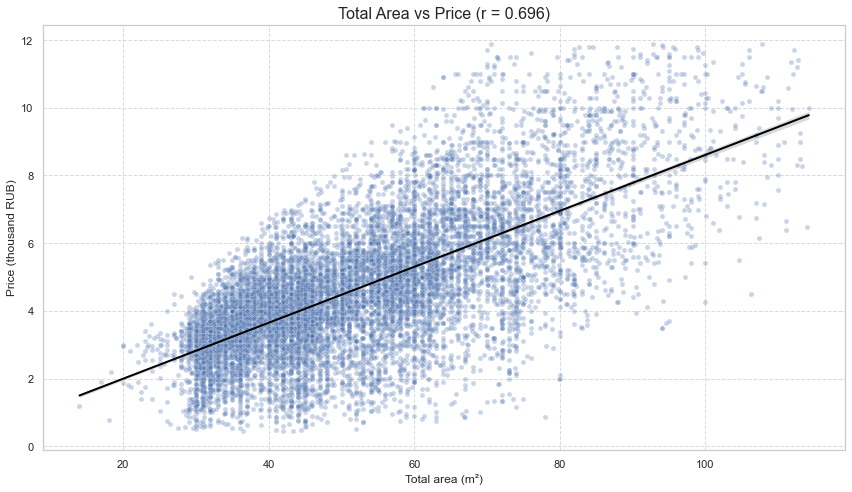

Correlation (total area vs price): 0.696


In [44]:
price_area = df[['total_area', 'last_price']]

corr_price_area = scatter_with_corr(
    price_area,
    x='total_area',
    y='last_price',
    title='Total Area vs Price',
    xlabel='Total area (m²)',
    ylabel='Price (thousand RUB)'
)

print(f'Correlation (total area vs price): {corr_price_area:.3f}')

The scatter plot shows a clear positive relationship: larger apartments tend to be more expensive.  
The Pearson correlation between total area and price is about **0.70**, which indicates a strong positive linear association.

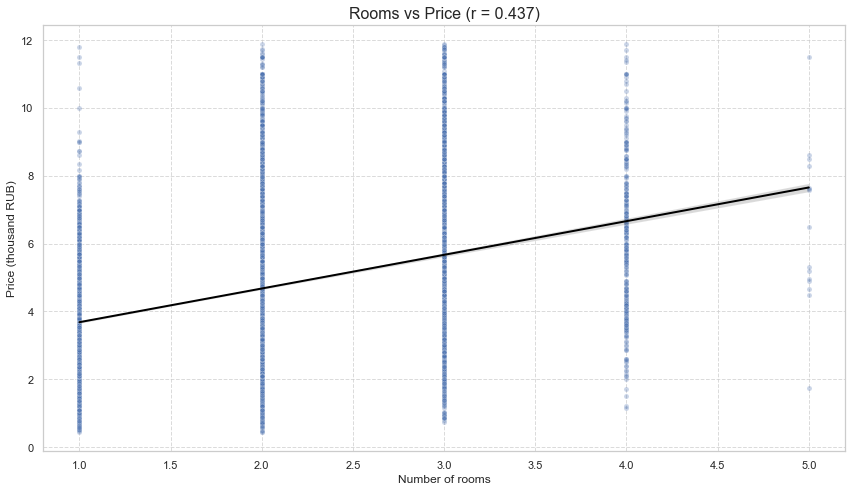

Correlation (rooms vs price): 0.437


In [45]:
price_rooms = df[['rooms', 'last_price']]

corr_price_rooms = scatter_with_corr(
    price_rooms,
    x='rooms',
    y='last_price',
    title='Rooms vs Price',
    xlabel='Number of rooms',
    ylabel='Price (thousand RUB)'
)

print(f'Correlation (rooms vs price): {corr_price_rooms:.3f}')

Since the number of rooms is a discrete variable, the plot displays vertical clusters at 1, 2, 3, 4, and 5 rooms.
Inside each cluster, prices vary significantly, meaning that having more rooms increases the typical price, but not as strongly as area.

The Pearson correlation of about 0.44 indicates a moderate positive relationship.
In practice, this reflects the fact that the number of rooms is correlated with area, but rooms alone are a weaker price determinant.

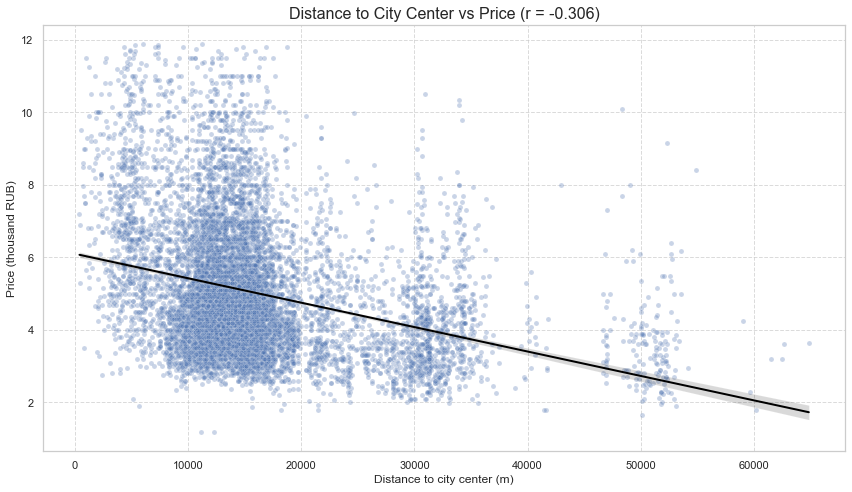

Correlation (city center vs price): -0.306


In [46]:
price_center = df[['city_centers_nearest', 'last_price']]

corr_price_center = scatter_with_corr(
    price_center,
    x='city_centers_nearest',
    y='last_price',
    title='Distance to City Center vs Price',
    xlabel='Distance to city center (m)',
    ylabel='Price (thousand RUB)'
)

print(f'Correlation (city center vs price): {corr_price_center:.3f}')

This graph shows that apartments located closer to the city center tend to be more expensive.
As the distance from the center increases, the cloud of points shifts downward, indicating lower prices.

The correlation of around –0.31 represents a moderate negative relationship:
- Greater distance — lower price.

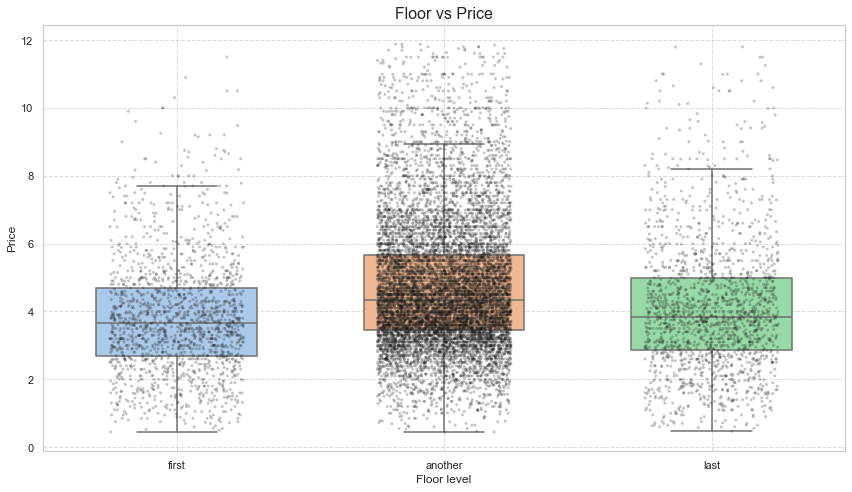

floor_level
another    4.35
first      3.65
last       3.85
Name: last_price, dtype: float64


In [ ]:
price_floor = df[['last_price', 'floor_level']]

plt.figure(figsize=(12, 7))

sns.boxplot(
    data=price_floor,
    x='floor_level',
    y='last_price',
    palette='pastel',
    width=0.6,        
    showfliers=False  
)


sns.stripplot(
    data=price_floor,
    x='floor_level',
    y='last_price',
    color='k',
    alpha=0.25,
    size=3,
    jitter=0.25
)

plt.title("Floor vs Price", fontsize=16)
plt.xlabel("Floor level", fontsize=12)
plt.ylabel("Price", fontsize=12)

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

floor_medians = price_floor.groupby('floor_level')['last_price'].median()
print(floor_medians)

The boxplot compares apartment prices across three categories:

- first floor,
- last floor,
- middle floors (“another”).

The median price for middle floors is generally slightly higher than for the first or last floors.
This fits well with typical buyer preferences: middle floors are perceived as more comfortable (less noise, less dust, no roof risks, and easier accessibility).

### Overall Summary

Across all examined features:

- Total area is the strongest driver of apartment price.

- Number of rooms also affects price but to a lesser degree.

- Distance to the city center shows a moderate negative impact — farther apartments tend to be cheaper.

- Floor level plays a secondary role: middle floors are slightly more expensive, but the effect is relatively small.

These findings together form a clear, logical economic model of the real estate market:

- Price grows with size and proximity to the center, while layout and floor level modify the value but do not determine it.

In [48]:
date_cols = ["year_exposition", "month_exposition", "weekday_exposition"]
price_to_date = df[["last_price"] + date_cols].copy()

# Helper: summary stats (count, mean, median)
def price_summary(col):
    return (
        price_to_date.groupby(col)["last_price"]
          .agg(count="count", mean="mean", median="median")
          .reset_index()
    )

price_by_year = price_summary("year_exposition")
price_by_month = price_summary("month_exposition")
price_by_wday = price_summary("weekday_exposition")

display(price_by_year.head())
display(price_by_month.head())
display(price_by_wday.head())

,year_exposition,count,mean,median
0,2015,342,4.657018,4.30
1,2016,1562,4.474020,4.10
2,2017,5732,4.517355,4.15
3,2018,5399,4.545231,4.25
4,2019,822,4.768796,4.50


,month_exposition,count,mean,median
0,1,810,4.537198,4.25
1,2,1526,4.554364,4.20
2,3,1270,4.502165,4.15
3,4,1045,4.563311,4.25
4,5,737,4.486581,4.20


,weekday_exposition,count,mean,median
0,1,2088,4.529009,4.200
1,2,2439,4.536544,4.200
2,3,2304,4.544475,4.200
3,4,2508,4.584956,4.225
4,5,2442,4.550864,4.200


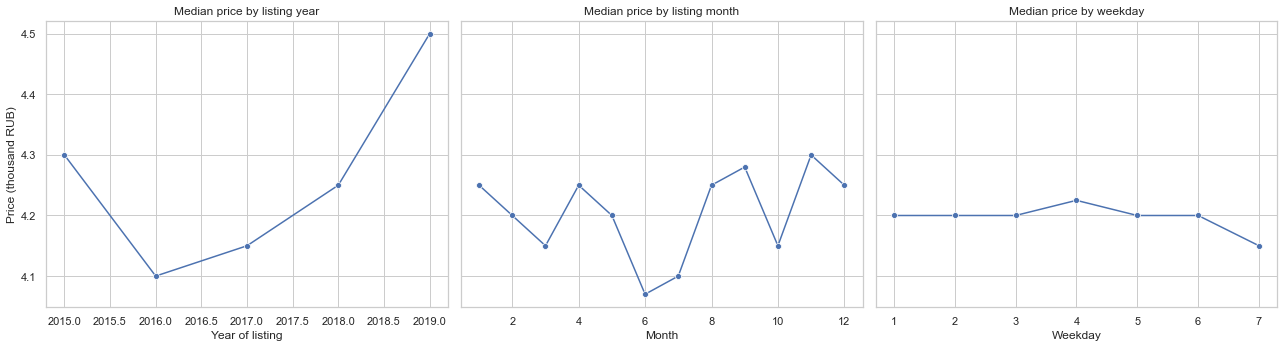

In [49]:
# --- 2. Lineplots of median price (more readable than raw scatter) ---
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# (a) By year
sns.lineplot(
    data=price_by_year,
    x="year_exposition",
    y="median",
    marker="o",
    ax=axes[0]
)
axes[0].set_title("Median price by listing year")
axes[0].set_xlabel("Year of listing")
axes[0].set_ylabel("Price (thousand RUB)")

# (b) By month
sns.lineplot(
    data=price_by_month,
    x="month_exposition",
    y="median",
    marker="o",
    ax=axes[1]
)
axes[1].set_title("Median price by listing month")
axes[1].set_xlabel("Month")
axes[1].set_ylabel("")

# (c) By weekday
# (1 = Monday, ..., 7 = Sunday – adjust if your coding is different)
sns.lineplot(
    data=price_by_wday,
    x="weekday_exposition",
    y="median",
    marker="o",
    ax=axes[2]
)
axes[2].set_title("Median price by weekday")
axes[2].set_xlabel("Weekday")
axes[2].set_ylabel("")

plt.tight_layout()
plt.show()

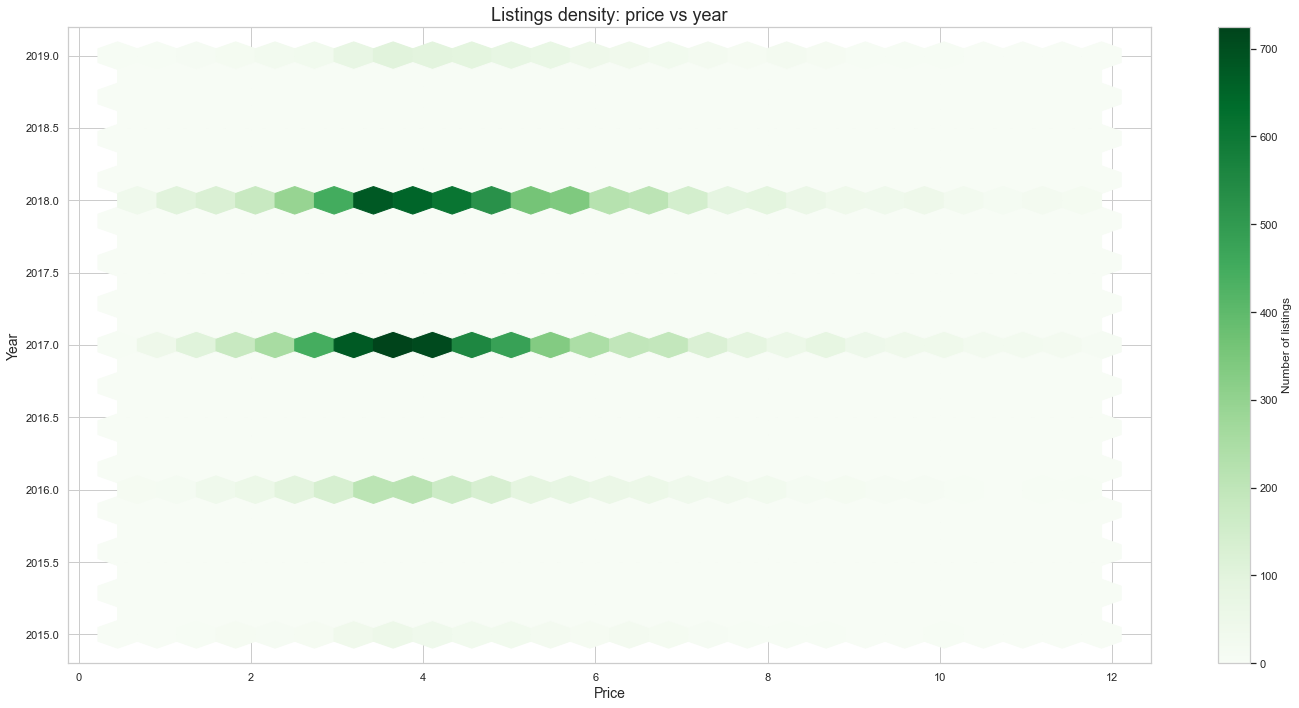

In [50]:
def hexbin_price_vs(col, ylabel, gridsize=25):
    plt.figure(figsize=(20, 10))
    hb = plt.hexbin(
        price_to_date["last_price"],
        price_to_date[col],
        gridsize=gridsize,
        cmap="Greens", 
        
    )
    plt.colorbar(hb, label="Number of listings")
    plt.xlabel("Price", fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.title(f"Listings density: price vs {ylabel.lower()}", fontsize=18)
    plt.tight_layout()
    plt.show()

hexbin_price_vs("year_exposition", "Year")

**By year of listing**

- The median apartment price slightly dips in 2016, then steadily grows from 2017 to 2019, reaching its highest level in 2019.

- The hexbin plot shows that the bulk of listings every year stays in roughly the same price band, but in 2018–2019 there are more listings at higher prices, which matches the increase in median price.

- Overall, there is a moderate upward trend in prices over time, but no sudden jumps.

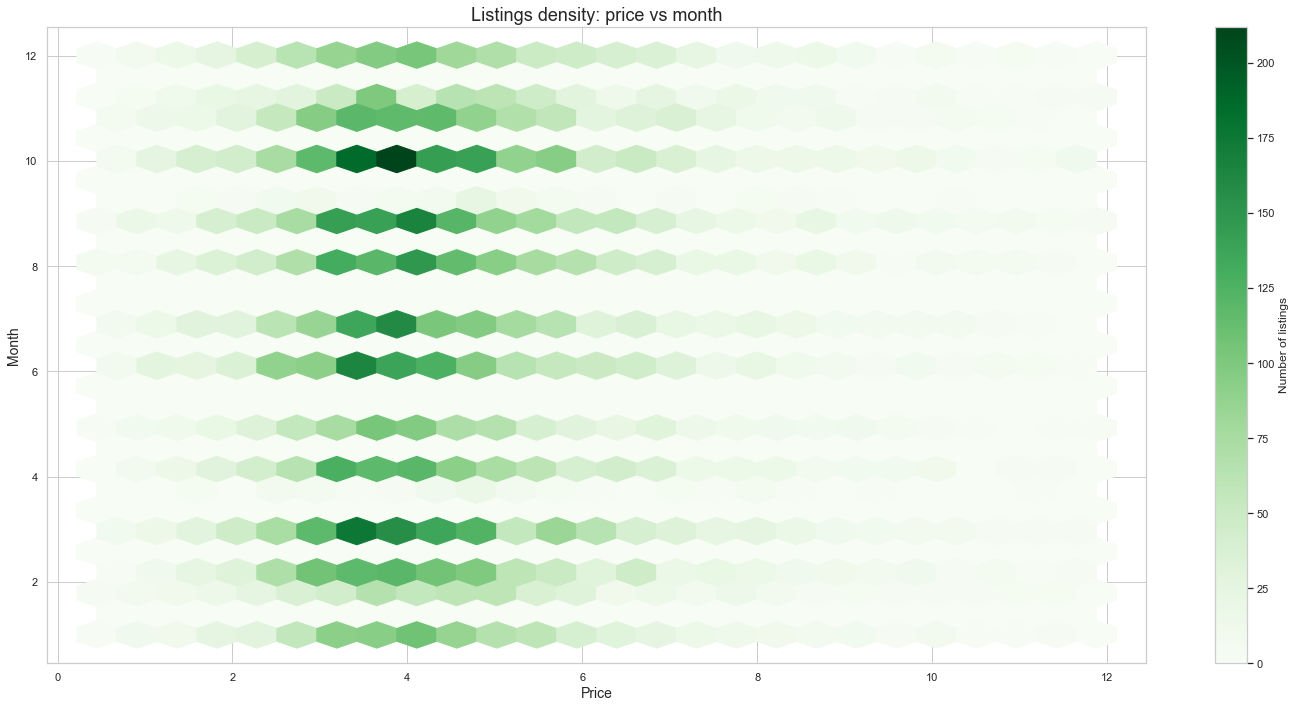

In [51]:
hexbin_price_vs("month_exposition", "Month")

**By month of listing**

- Median prices do not change much across months: they fluctuate within a narrow range, around the same central level.

- The density plot shows that most listings are concentrated around 3.5–4.5 thousand RUB in every month, with only small differences.

- There are activity peaks in some months (for example March–April and October–November), but these peaks are more about the number of listings than about clear price changes.

- Conclusion: seasonality in price is weak – the month of listing has only a minor effect on the typical price level.

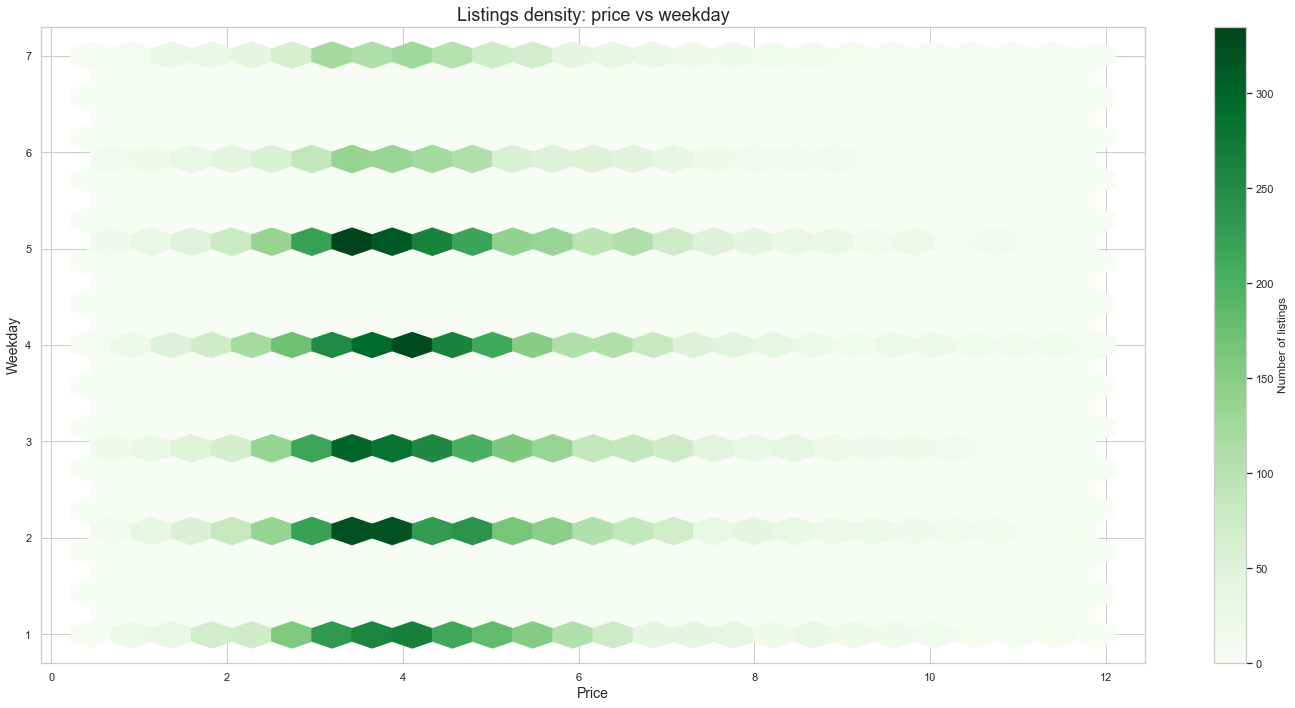

In [52]:
hexbin_price_vs("weekday_exposition", "Weekday")

**By weekday of listing**

- Median price by weekday is almost flat: differences between days are very small.

- The density plot shows that most listings across all weekdays fall into the same price range, again around 3.5–4.5 thousand RUB.

- Listing activity is higher on working days (especially mid-week) and lower on weekends, but prices themselves don’t change much with weekday.

**General takeaway**

- Time of listing influences volume more than price.

  - Over the years, prices show a gradual upward trend.

  - By month and weekday, we mainly see changes in how many apartments are listed, not strong changes in the price level.

- For a pricing model or an automated monitoring system, year (macro-trend) should be taken into account, while month and weekday can be treated as weak or secondary factors for price, but potentially useful for understanding demand and platform activity.

***

In [53]:
# Top-10 localities by number of listings
top_10_cities = (
    df['locality_name']
    .value_counts()
    .head(10)
    .index
    .tolist()
)
top_10_cities

['санкт-петербург',
 'поселок мурино',
 'поселок шушары',
 'всеволожск',
 'колпино',
 'поселок парголово',
 'гатчина',
 'пушкин',
 'деревня кудрово',
 'петергоф']

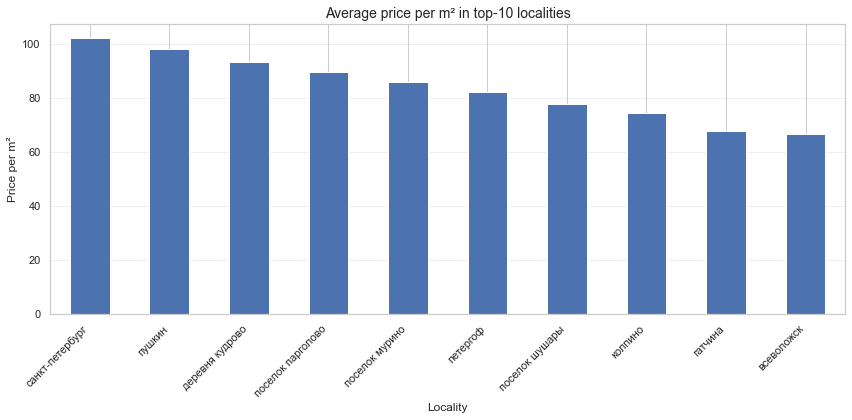

In [66]:
# Average price per m² in these localities
price_by_city = (
    df[df['locality_name'].isin(top_10_cities)]
    .groupby('locality_name', as_index=True)['price_per_meter']
    .mean()
    .sort_values(ascending=False)
)

plt.figure(figsize=(12, 6))
price_by_city.plot(kind='bar')

plt.title('Average price per m² in top-10 localities', fontsize=14)
plt.xlabel('Locality', fontsize=12)
plt.ylabel('Price per m²', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

/var/folders/84/hv0r6k_d7xz2z8l3stljphsh0000gn/T/ipykernel_42380/3600748266.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spb['city_centers_nearest_km'] = (df_spb['city_centers_nearest'] / 1000).round()


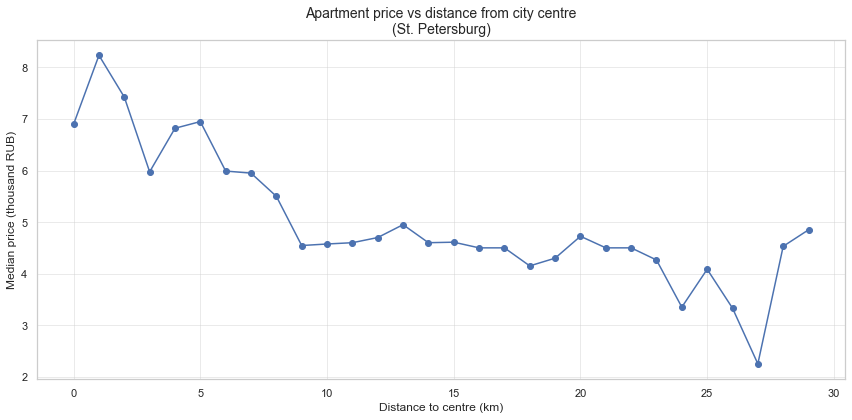

In [55]:
# Subset for St. Petersburg
df_spb = df.query("locality_name == 'санкт-петербург'")

# Distance to centre in km (rounded)
df_spb['city_centers_nearest_km'] = (df_spb['city_centers_nearest'] / 1000).round()

# Median price by distance
distance_price = (
    df_spb
    .groupby('city_centers_nearest_km', as_index=True)['last_price']
    .median()
    .sort_index()
)

plt.figure(figsize=(12, 6))
plt.plot(distance_price.index, distance_price.values, marker='o')

plt.title('Apartment price vs distance from city centre\n(St. Petersburg)', fontsize=14)
plt.xlabel('Distance to centre (km)', fontsize=12)
plt.ylabel('Median price (thousand RUB)', fontsize=12)
plt.grid(True, alpha=0.4)

plt.tight_layout()
plt.show()


Next, we will need to select a segment of apartments in the center and study the area, price, number of rooms, ceiling height. It is also necessary to highlight the factors that affect the cost of an apartment (number of rooms, floor, distance from the center, date of placement of the announcement).

I will select 8km from the center - this is the point where the graph starts to decline.

In [56]:
center_cutoff_km = 8
spb_center = df_spb[df_spb['city_centers_nearest_km'] <= center_cutoff_km]

spb_center.describe()


,last_price,total_area,living_area,kitchen_area,rooms,ceiling_height,floor,floors_total,balcony,days_exposition,...,parks_nearest,ponds_around_3000,ponds_nearest,price_per_meter,weekday_exposition,month_exposition,year_exposition,living_share,kitchen_share,city_centers_nearest_km
count,1117.000000,1117.000000,1117.000000,1117.000000,1117.000000,1117.000000,1117.000000,1116.000000,1117.000000,1117.000000,...,619.000000,1117.000000,773.000000,1117.000000,1117.000000,1117.000000,1117.000000,1117.000000,1117.000000,1117.000000
mean,6.610474,59.279597,34.493850,9.850591,2.128917,2.690331,4.592659,8.347670,0.393017,133.386750,...,492.357027,1.139660,502.912031,113.935118,3.615040,6.865712,2017.225604,0.573317,0.176200,5.555058
std,2.170516,19.457524,14.121746,3.295780,0.872435,0.089877,3.445383,4.937012,0.776252,125.456674,...,331.946871,1.009903,256.243054,23.659329,1.729583,3.362754,0.850441,0.102542,0.064115,1.889384
min,1.900000,17.000000,6.000000,2.000000,1.000000,2.400000,1.000000,2.000000,0.000000,3.000000,...,16.000000,0.000000,22.000000,26.250000,1.000000,1.000000,2015.000000,0.194000,0.061000,0.000000
25%,4.950000,44.000000,22.600000,7.300000,1.000000,2.700000,2.000000,5.000000,0.000000,35.000000,...,300.000000,0.000000,306.000000,97.015000,2.000000,4.000000,2017.000000,0.513000,0.131000,4.000000
50%,6.450000,57.000000,32.400000,9.100000,2.000000,2.700000,4.000000,6.000000,0.000000,90.000000,...,450.000000,1.000000,495.000000,111.369000,4.000000,7.000000,2017.000000,0.581000,0.163000,6.000000
75%,8.100000,72.000000,44.000000,12.000000,3.000000,2.700000,6.000000,10.000000,1.000000,193.000000,...,603.500000,2.000000,690.000000,130.168000,5.000000,10.000000,2018.000000,0.650000,0.208000,7.000000
max,11.880000,114.200000,77.000000,19.400000,5.000000,2.920000,23.000000,28.000000,5.000000,509.000000,...,2295.000000,3.000000,1199.000000,170.312000,7.000000,12.000000,2019.000000,0.902000,0.548000,8.000000


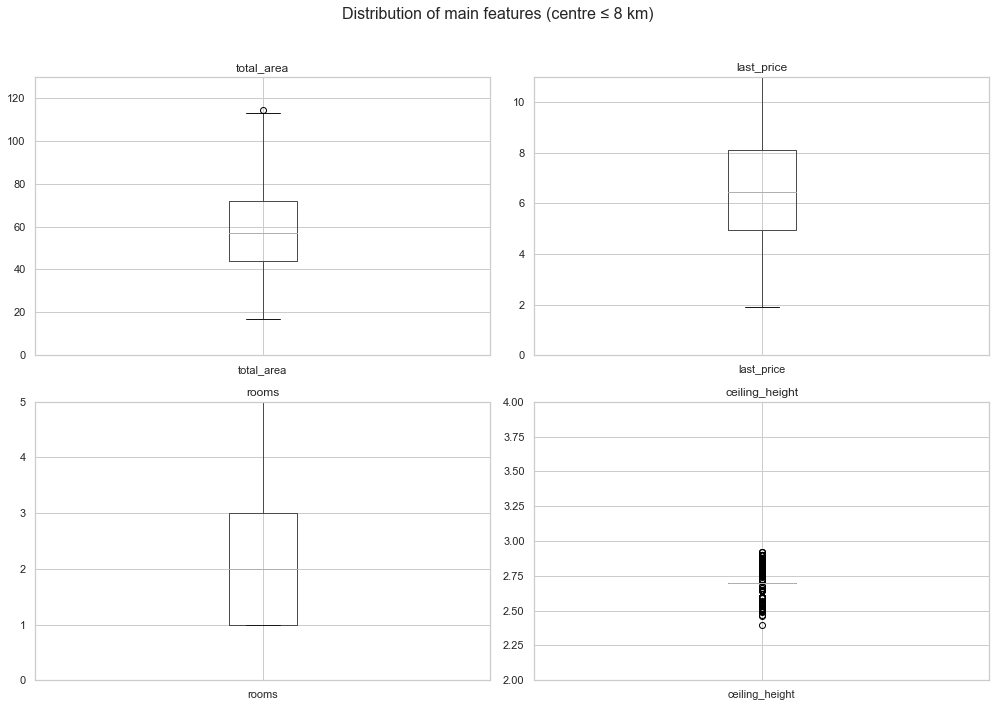

In [57]:
cols_box = ['total_area', 'last_price', 'rooms', 'ceiling_height']
ylims = {
    'total_area': (0, 130),
    'last_price': (0, 11),
    'rooms': (0, 5),
    'ceiling_height': (2, 4),
}

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

for ax, col in zip(axes, cols_box):
    spb_center.boxplot(column=col, ax=ax)
    ax.set_title(col, fontsize=12)
    ax.set_ylim(*ylims[col])
    ax.set_ylabel('')

plt.suptitle('Distribution of main features (centre ≤ 8 km)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


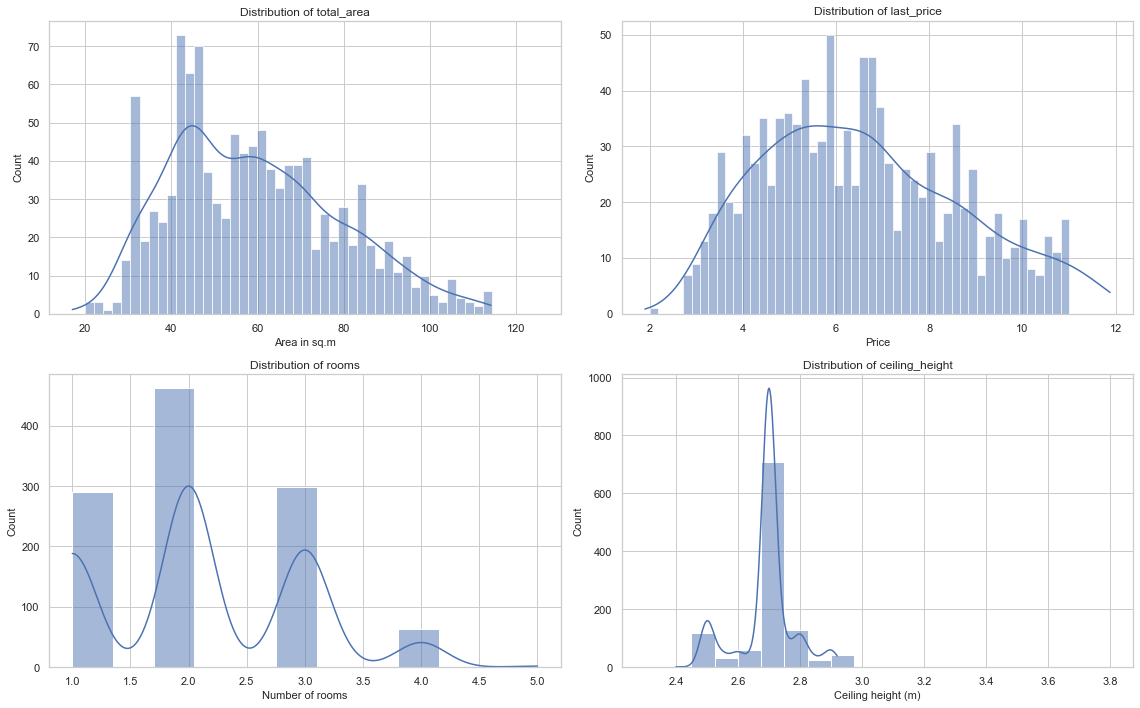

In [65]:
hist_specs = [
    ('total_area',      50, (20, 125),   'Area in sq.m'),
    ('last_price',      50, (2, 11), 'Price'),
    ('rooms',           10, (1, 4.5),    'Number of rooms'),
    ('ceiling_height',  20, (2.3, 3.8),      'Ceiling height (m)')
]

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

for ax, (col, bins, rng, xlabel) in zip(axes.ravel(), hist_specs):
    sns.histplot(
        data=spb_center,
        x=col,
        bins=bins,
        binrange=rng,
        kde=True,
        ax=ax
    )
    ax.set_title(f'Distribution of {col}', fontsize=12)
    ax.set_xlabel(xlabel, fontsize=11)
    ax.set_ylabel('Count', fontsize=11)

plt.tight_layout()
plt.show()


**1. Total Area**

- The majority of apartments near the center range between 40–70 m².

- The distribution is right-skewed, meaning there are a few larger apartments (90–120 m²), but they are uncommon.

- This suggests that central housing is dominated by compact to medium-sized apartments, likely due to limited space and historical buildings.

**2. Price**

- Prices cluster mostly between 4,000–8,000 thousand RUB, with many listings around 6,000–7,000 thousand RUB.

- There is a visible tail toward 10–12 million RUB — these are larger or premium central apartments.

- The overall pattern is moderately right-skewed, indicating that luxury units pull the upper tail but do not dominate the market.

**3. Number of Rooms**

- The central market is dominated by 1-, 2- and 3-room apartments:

  - 2-room apartments are the most common.

  - 1-room and 3-room units follow.

  - 4-room apartments exist but are rare.

- The multimodal shape clearly shows separate clusters for each room category, reflecting standard Soviet/Russian layout patterns.

**4. Ceiling Height**

- Ceiling heights are tightly concentrated between 2.6–2.8 m, which indicates:

  - A high level of standardization in buildings located within ≤ 8 km from the center.

  - Most of these apartments are likely in modern buildings, as pre-revolutionary central housing with ceilings 3.2–3.7 m is much rarer in this dataset.

- A few apartments have slightly higher ceilings (~3.0 m+), but these are very uncommon.

**Overall Insights**

- Central St. Petersburg apartments (≤ 8 km from the center) are:

  - Mostly medium-sized (40–70 m²)

  - Priced around 6–7 million RUB

  - Primarily 2-room units

  - Standardized in ceiling height (2.6–2.8 m)

This indicates a central housing market shaped by:

  - High demand and limited space → fewer large apartments.

  - Modern residential construction → standardized ceiling heights.

  - Affordability constraints → dominance of 1–3 room units.

  - Price premium due to location → concentrated around mid-high segment with a few luxury outliers.

  ***

In [59]:
cols = [
    'last_price', 'rooms', 'city_centers_nearest_km',
    'floor_level', 'weekday_exposition', 'month_exposition', 'year_exposition'
]
factors = spb_center[cols]

time_factors = factors[['last_price', 'weekday_exposition',
                        'month_exposition', 'year_exposition']].copy()

# Quick look at correlations for the numeric factors we care about
corr_rooms = factors['last_price'].corr(factors['rooms'])
corr_dist  = factors['last_price'].corr(factors['city_centers_nearest_km'])

print(f"Correlation (rooms vs price): {corr_rooms:.3f}")
print(f"Correlation (distance vs price): {corr_dist:.3f}")

Correlation (rooms vs price): 0.485
Correlation (distance vs price): -0.195


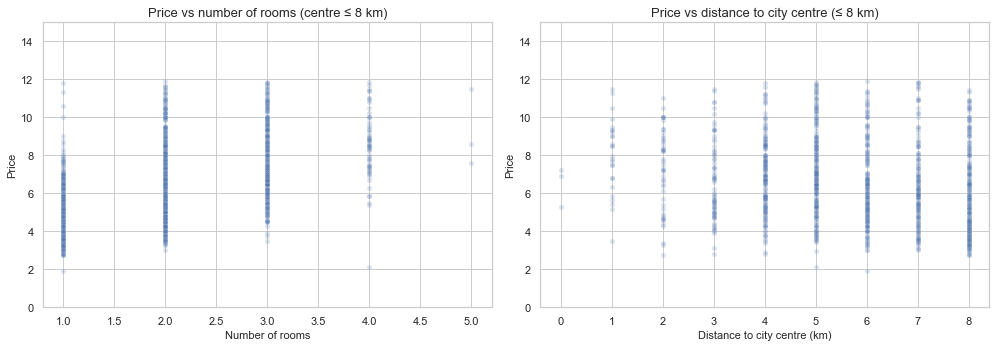

In [60]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.scatterplot(
    data=factors, x='rooms', y='last_price',
    alpha=0.2, s=25, ax=axes[0]
)
axes[0].set_title('Price vs number of rooms (centre ≤ 8 km)', fontsize=13)
axes[0].set_xlabel('Number of rooms', fontsize=11)
axes[0].set_ylabel('Price', fontsize=11)
axes[0].set_ylim(0, 15)

# (b) Distance vs price
sns.scatterplot(
    data=factors, x='city_centers_nearest_km', y='last_price',
    alpha=0.2, s=25, ax=axes[1]
)
axes[1].set_title('Price vs distance to city centre (≤ 8 km)', fontsize=13)
axes[1].set_xlabel('Distance to city centre (km)', fontsize=11)
axes[1].set_ylabel('Price', fontsize=11)
axes[1].set_ylim(0, 15)

plt.tight_layout()
plt.show()

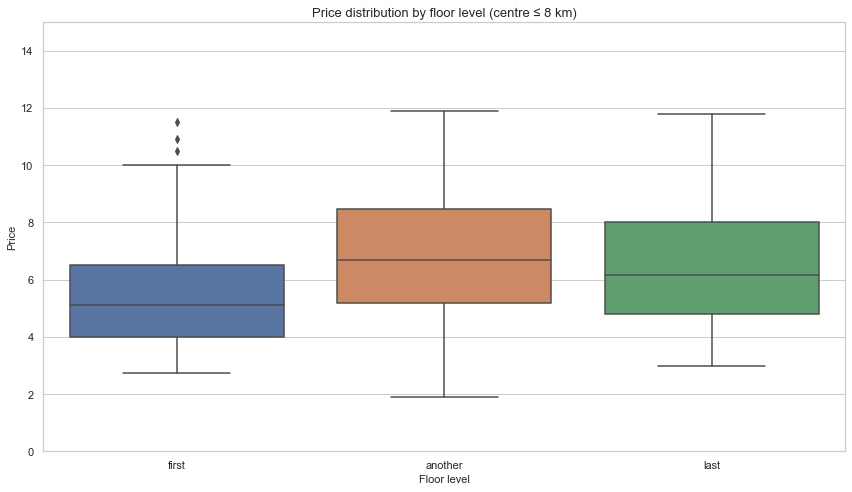

In [61]:
plt.figure(figsize=(12, 7))
sns.boxplot(
    data=factors,
    x='floor_level',          # categories: e.g. 'first', 'another', 'last'
    y='last_price'
)
plt.title('Price distribution by floor level (centre ≤ 8 km)', fontsize=13)
plt.xlabel('Floor level', fontsize=11)
plt.ylabel('Price', fontsize=11)
plt.ylim(0, 15)
plt.tight_layout()
plt.show()

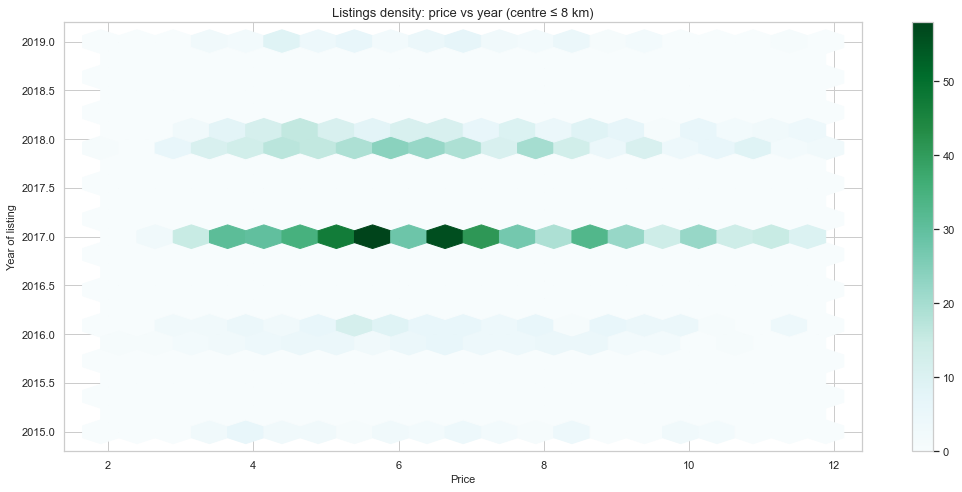

In [68]:
time_factors.plot(
    x='last_price', y='year_exposition',
    kind='hexbin', gridsize=20, figsize=(15, 7), sharex=False
)

plt.title('Listings density: price vs year (centre ≤ 8 km)', fontsize=13)
plt.xlabel('Price', fontsize=11)
plt.ylabel('Year of listing', fontsize=11)
plt.tight_layout()
plt.show()

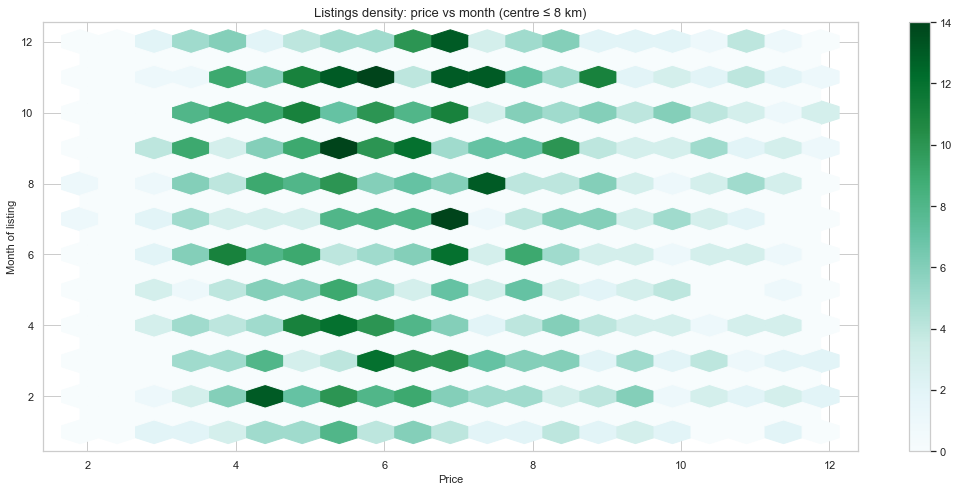

In [63]:
time_factors.plot(
    x='last_price', y='month_exposition',
    kind='hexbin', gridsize=20, figsize=(15, 7), sharex=False
)
plt.title('Listings density: price vs month (centre ≤ 8 km)', fontsize=13)
plt.xlabel('Price', fontsize=11)
plt.ylabel('Month of listing', fontsize=11)
plt.tight_layout()
plt.show()

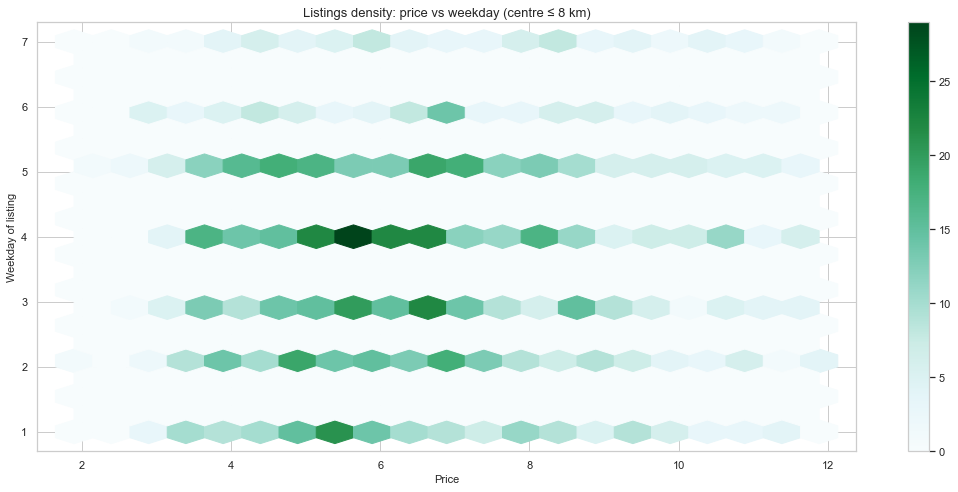

In [64]:
time_factors.plot(
    x='last_price', y='weekday_exposition',
    kind='hexbin', gridsize=20, figsize=(15, 7), sharex=False
)
plt.title('Listings density: price vs weekday (centre ≤ 8 km)', fontsize=13)
plt.xlabel('Price', fontsize=11)
plt.ylabel('Weekday of listing', fontsize=11)  # 1–7
plt.tight_layout()
plt.show()

### Conclusion

**1. Number of rooms has a clear positive relationship with price**

The scatterplot shows distinct vertical clusters for 1–5 rooms. As the number of rooms increases, the typical price level rises as well:

- 1-room apartments are mostly the cheapest.

- 2–3 rooms show a strong price increase and the densest distribution.

- 4–5 rooms continue the trend, with visibly higher price ceilings.

This trend is confirmed by the positive correlation.


**2. Distance to the city centre shows only a weak negative effect**

Although apartments closer than 1–2 km tend to have higher prices, the scatterplot is very dispersed at every distance point.

- Prices at 2–8 km overlap heavily.

- Correlation is close to zero.

- No strong downward trend with increasing distance.

The dataset is likely biased because it includes only central districts (≤ 8 km), which naturally have similar price levels.

**3. Floor level shows meaningful differences**

Boxplots for first, middle (“another”), and top (“last”) floors show:

- First floor → lowest median price (often less desirable).

- Middle floors → highest median and widest price range.

- Top floor → slightly cheaper than middle, but more expensive than the first.


This matches real market behaviour in St. Petersburg (beautiful historical buildings, comfortable upper floors).

**4. Listing year shows slight price shifts**

Hexbin maps indicate:

- Most listings came from 2017, with price concentration around 5–7 million RUB.

- Years 2018–2019 look similar with no drastic structural changes.


**5. Some seasonality by month is visible**

From the price vs listing month hexbin:

- Most active months: February, April, September, October (highest density of listings)

- Price levels remain stable across months, with no obvious seasonal drop or rise.


**6. Weekday of listing has no meaningful price effect**

- Hexbin charts show evenly spread densities across all weekdays, with slighly higher density on Thursday



**Overall Summary**

The price of an apartment within 8 km of the city centre is primarily driven by:

Strong influence

- Number of rooms
- Floor level

Weak or minimal influence

- Distance to the centre (within 8 km)
- Year and month of listing
- Weekday of listing


# Final Conclusion of the Real Estate Market Study

This study explored the real estate market of St. Petersburg and nearby localities using historical listings from Yandex Real Estate. Through systematic data cleaning, preprocessing, exploratory analysis, and visualisation, we identified the key factors affecting apartment prices and revealed structural patterns in both the entire regional market and the central segment (defined as listings ≤ 8 km from the city centre).

Below is a unified, coherent conclusion based on all analyses conducted.

**1. Market Structure and Price Geography**

Across the full dataset, the market is highly heterogeneous. Prices vary significantly depending on the locality:

- St. Petersburg itself is the clear premium zone with the highest price per square meter.

- Suburban towns and villages have much lower pricing, forming a wide lower-cost segment.

- Localities closer to transportation hubs and major districts show mid-level pricing.

This confirms that location is the strongest determinant of price in the overall dataset.

**2. Price Drivers in the Overall Market**

Several features consistently influence price:

**Distance to the city centre**

Across the entire dataset, distance shows a clear negative relationship:

- Closer to the centre → more expensive.

- A noticeable price drop occurs after ~4–6 km.

**Number of rooms**

A strong positive relationship:

- Each additional room significantly increases the price.

- Clusters around 1-, 2-, 3-room flats are clearly visible and well separated.

**Floor level**

In the general dataset:

- First floors tend to be cheaper.

- Middle floors are priced highest.

- Very high floors vary by building type (old vs modern high-rise).

**Apartment characteristics**

From our histograms:

- Most listings have 1–3 rooms.

- Ceiling height and area vary widely, affecting price through perceived comfort and quality.

**3. Time-Related Patterns**

Across the whole region:

- By year: Price levels and listing volumes peaked around 2017–2018.

- By month: Listing activity rises in early spring and autumn (market cycles).

- By weekday: More listings are posted on weekdays, especially Tuesday–Friday.

These temporal patterns reflect listing behaviour rather than price changes.

**4. Central Segment Analysis (≤ 8 km)**

When isolating apartments close to the city centre, the dynamics change significantly.

**More homogeneous and more expensive market**

- Lower variation in low-end prices: almost no “cheap” flats.

- Most prices cluster around 5–8 million RUB.

**Distance loses predictive power**

- Inside the central ring, every location is considered attractive:

- Correlation between price and distance from centre → close to zero.

- Scatter plots show heavy overlap at all distances 1–8 km.

**Internal characteristics dominate**

In the central area:

- Number of rooms is the strongest price driver.

- Floor level shows a clear structure:

  - First floor = cheapest

  - Middle floors = highest stability and value

  - Top floors = attractive, especially in historical low-rise central buildings

**Time factors remain weak influencers**

Year, month, and weekday patterns mostly reflect listing frequency, not price shifts.

**Centre vs. Full Market**

The central market behaves like a premium micro-market where apartment-internal features matter more than geography.

### Final Summary

This analysis shows that the St. Petersburg real estate market is shaped by a combination of:

**1. Geographic factors**

- location and proximity to the centre — strongest in the whole dataset 

**2. Structural apartment features**

- number of rooms, area, floor level — strongest in the central segment

**3. Behavioural market cycles**

- observed through year, month, weekday patterns 

In the overall region, price differences are driven primarily by where an apartment is located.
In the central 8 km, where location is equally desirable across all listings, prices depend mostly on what the apartment offers (size, rooms, floor).

The study successfully identifies:

- Key variables influencing price

- Market segmentation patterns

- Seasonal and yearly listing behaviour

- Differences between general and central submarkets